In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import os
from matplotlib_venn import venn2


In [3]:
marker_df = pd.read_csv('Human_blood_marker_processed.csv')
print(marker_df.shape)
marker_df.head()

(147, 6)


,Species,Tissue,super_type,CellType,Marker,Resource
0,Human,Blood,B,Activated B cell,"CD5, MIR155HG, TAGLN2","35025971, 28910360, 2474446"
1,Human,Blood,T_CD4,"Activated CD4-positive, alpha-beta T cell","CD4, CCR6, CD14, CD19, CD38, CD3D, CD3G, CD69,...","35381424, 32783921, 35831277, 34529726, 103413..."
2,Human,Blood,T_CD4,"Activated CD4-positive, CD25-positive, CCR4-po...","CD3D, CD3E, CD3G, CD4, FOXP3",30977974
3,Human,Blood,NaN,Adult endothelial progenitor cell,"KDR, PROM1, CD34, PTPRC, PECAM1, CD14","27561827, 29391882, 24641802, 29147957, 267700..."
4,Human,Blood,T,Alpha-beta T cell,"CD3D, CD3E, CD3G, IL7R","34284174, 28777444"


In [4]:
marker_df['super_type'].unique()

array(['B', 'T_CD4', nan, 'T', 'Monocyte', 'DC', 'NK', 'T_CD4_cytotoxic',
       'T_CD4_memory', 'T_CD8_cytotoxic', 'T_CD8_memory', 'T_CD8',
       'T_CD4_Tcm', 'T_CD8_Tcm', 'T_cm', 'B_memory', 'T_CD4_Tem', 'T_em',
       'T_CD8_Tem', 'Erythrocyte', 'T_helper', 'T_reg', 'T_memory',
       'B_naive', 'Platelet'], dtype=object)

In [5]:
marker_df[marker_df['super_type'] == 'T_CD4']

,Species,Tissue,super_type,CellType,Marker,Resource
1,Human,Blood,T_CD4,"Activated CD4-positive, alpha-beta T cell","CD4, CCR6, CD14, CD19, CD38, CD3D, CD3G, CD69,...","35381424, 32783921, 35831277, 34529726, 103413..."
2,Human,Blood,T_CD4,"Activated CD4-positive, CD25-positive, CCR4-po...","CD3D, CD3E, CD3G, CD4, FOXP3",30977974
23,Human,Blood,T_CD4,CD4-positive helper T cell,"CD3D, CD3E, CD3G, CD4, PTPRC",Company
26,Human,Blood,T_CD4,"CD4-positive, alpha-beta T cell","CD4, CD3D, CD3E, IL7R, CD3G, CCR7, IL2RA, LDHB...","32377375, 33096020, 35260865, 30016977, 313321..."
27,Human,Blood,T_CD4,"CD4-positive, CD25-positive, alpha-beta regula...","CD4, CD3D, CD3E, CD3G, IL2RA, FOXP3, IL7R, PTPRC","34824394, Company, 30977974"
28,Human,Blood,T_CD4,"CD4-positive, CD25-positive, CD127-high, alpha...","CD3D, CD3E, CD3G, CD4, IL2RA, IL7R",30977974
55,Human,Blood,T_CD4,"Effector CD4-positive, alpha-beta T cell","CD3D, CD4, CXCR3, GZMA, GZMK, KLRB1, NKG7, TGFB1","35831277, 33861994"
104,Human,Blood,T_CD4,"Naive thymus-derived CD4-positive, alpha-beta ...","CCR7, CD4, SELL, LEF1, TCF7, CD3D, ATM, CD27, ...","32377375, 35381424, 31118283, 35025971, 358312..."
121,Human,Blood,T_CD4,"Proliferating CD4-positive, alpha-beta T cell","MKI67, STMN1, TUBA1B",35831277


In [6]:
marker_df[marker_df['super_type'].str.contains('CD4', na=False)]

,Species,Tissue,super_type,CellType,Marker,Resource
1,Human,Blood,T_CD4,"Activated CD4-positive, alpha-beta T cell","CD4, CCR6, CD14, CD19, CD38, CD3D, CD3G, CD69,...","35381424, 32783921, 35831277, 34529726, 103413..."
2,Human,Blood,T_CD4,"Activated CD4-positive, CD25-positive, CCR4-po...","CD3D, CD3E, CD3G, CD4, FOXP3",30977974
23,Human,Blood,T_CD4,CD4-positive helper T cell,"CD3D, CD3E, CD3G, CD4, PTPRC",Company
24,Human,Blood,T_CD4_cytotoxic,"CD4-positive, alpha-beta cytotoxic T cell","GNLY, GZMH, NKG7",35831277
25,Human,Blood,T_CD4_memory,"CD4-positive, alpha-beta memory T cell","CCR7, CD4, CD3G, IL7R, SELL, CD27, CD3D, CD3E,...","35017482, 32514174, 33482359, 35025971, 338918..."
26,Human,Blood,T_CD4,"CD4-positive, alpha-beta T cell","CD4, CD3D, CD3E, IL7R, CD3G, CCR7, IL2RA, LDHB...","32377375, 33096020, 35260865, 30016977, 313321..."
27,Human,Blood,T_CD4,"CD4-positive, CD25-positive, alpha-beta regula...","CD4, CD3D, CD3E, CD3G, IL2RA, FOXP3, IL7R, PTPRC","34824394, Company, 30977974"
28,Human,Blood,T_CD4,"CD4-positive, CD25-positive, CD127-high, alpha...","CD3D, CD3E, CD3G, CD4, IL2RA, IL7R",30977974
34,Human,Blood,T_CD4_Tcm,"Central memory CD4-positive, alpha-beta T cell","CCR7, CD4, SELL, AQP3, CD3E, CD3D, CD3G, LTB, ...","32377375, 35549406, 31118283, 32286271, 316754..."
55,Human,Blood,T_CD4,"Effector CD4-positive, alpha-beta T cell","CD3D, CD4, CXCR3, GZMA, GZMK, KLRB1, NKG7, TGFB1","35831277, 33861994"


In [7]:
marker_df['CellType'].unique()

array(['Activated B cell', 'Activated CD4-positive, alpha-beta T cell',
       'Activated CD4-positive, CD25-positive, CCR4-positive, alpha-beta regulatory T cell, human',
       'Adult endothelial progenitor cell', 'Alpha-beta T cell',
       'Alternatively activated macrophage', 'Atypical B cell', 'B cell',
       'Basophil', 'Cardiac muscle cell',
       'CD14-low, CD16-positive monocyte', 'CD14-positive monocyte',
       'CD14-positive, CD16-negative classical monocyte',
       'CD14-positive, CD16-positive monocyte',
       'CD141-positive, CLEC9A-positive dendritic cell',
       'CD16-negative natural killer cell',
       'CD16-negative, CD56-bright natural killer cell, human',
       'CD16-positive myeloid dendritic cell',
       'CD16-positive natural killer cell',
       'CD16-positive, CD56-dim natural killer cell, human',
       'CD1c-positive myeloid dendritic cell', 'CD38-positive B cell',
       'CD4-intermediate, CD8-positive double-positive thymocyte',
       'CD4-posit

## Read PreLect features

In [8]:
types = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [9]:
# os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level1/feature_selection_k3')
# os.chdir(r'C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\feature_selection_k3')
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/feature_selection_k3')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df_k3 = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df_k3
    except:
        print('skipping:', celltype)
        continue

count_df_k3 = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df_k3 = features_dict[celltype]
    feature_count = feature_df_k3.shape[0]
    positive_count = feature_df_k3[feature_df_k3['Tendency'] == 1].shape[0]
    count_df_k3.loc[celltype] = [feature_count, positive_count]
count_df_k3

,Feature_count,Positive_feature_count
B,19,10
CD4_T,201,95
CD8_T,23,9
DC,50,23
Mono,50,20
NK,33,17
other,5,3
other_T,247,112


In [9]:
# Do two comparisons:
#   1. All_PreLect vs. Marker in database
#   2. Positive_PreLect vs. Marker in database
def compare_PreLect_w_marker(celltype, PreLect_dict, marker_genes, name=''):
    if name == '':
        name = celltype
    # Extracting the features and marker genes
    feature_df = PreLect_dict[celltype]
    features = feature_df['Gene'].tolist()
    positve_features = feature_df[feature_df['Tendency'] == 1]['Gene'].tolist()
    # marker_genes = marker_df['official gene symbol'].tolist()

    ### All features
    # Finding common elements
    common_all = list(set(features) & set(marker_genes))
    print(celltype, 'All features common with markers:', len(common_all))
    # Preparing sets for Venn diagram
    features_set = set(features)
    marker_genes_set = set(marker_genes)
    # Plotting Venn diagram
    plt.figure(figsize=(8, 5))
    v = venn2([features_set, marker_genes_set], set_labels=('PreLect all', f'{name} Marker'))
    plt.title(name, fontsize=16)
    for text in v.set_labels:
        text.set_fontsize(14)
    for text in v.subset_labels:
        text.set_fontsize(16)
    plt.show()

    ### Positive features
    # Finding common elements
    common_positive = list(set(positve_features) & set(marker_genes))
    print(celltype, 'Positive features common with markers:', len(common_positive))
    # Preparing sets for Venn diagram
    positive_features_set = set(positve_features)
    marker_genes_set = set(marker_genes)
    # Plotting Venn diagram
    plt.figure(figsize=(8, 5))
    v = venn2([positive_features_set, marker_genes_set], set_labels=('PreLect positive', f'{name} Marker'), set_colors=('blue', 'green'))
    plt.title(name, fontsize=16)
    for text in v.set_labels:
        text.set_fontsize(14)
    for text in v.subset_labels:
        text.set_fontsize(16)
    plt.show()

    return common_all, common_positive


In [10]:
def get_celltype_marker(name, marker_df):
    string = marker_df[marker_df['CellType'] == name]['Marker'].tolist()[0]
    marker_list = string.split(', ')
    return marker_list

In [11]:
overlapped_dict = {}

## B

B All features common with markers: 8


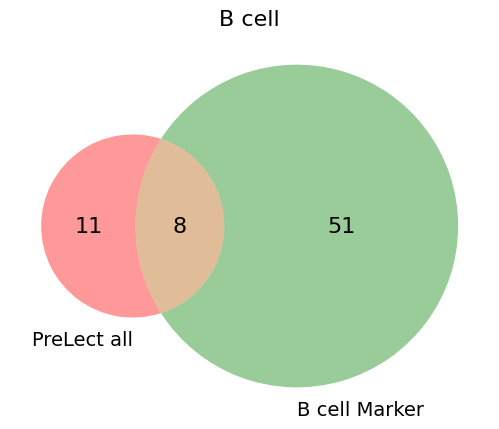

B Positive features common with markers: 7


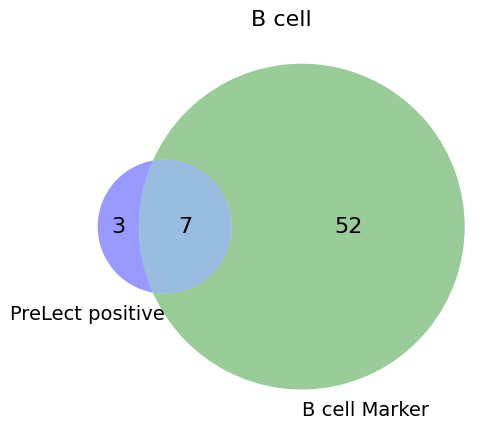

B_common: ['CD74', 'MS4A1', 'IGKC', 'CD79B', 'CD79A', 'IGHM', 'HLA-DRA', 'PTPRC']
B_common_p: ['CD74', 'MS4A1', 'CD79B', 'IGKC', 'CD79A', 'IGHM', 'HLA-DRA']


In [12]:
name = 'B cell'
B_common, B_common_p = compare_PreLect_w_marker('B', features_dict, get_celltype_marker(name, marker_df), name='B cell')
overlapped_dict['B'] = B_common
print('B_common:', B_common)
print('B_common_p:', B_common_p)

## CD4 T

CD4_T All features common with markers: 13


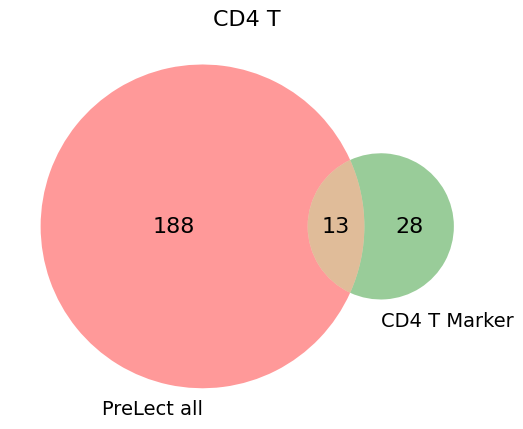

CD4_T Positive features common with markers: 9


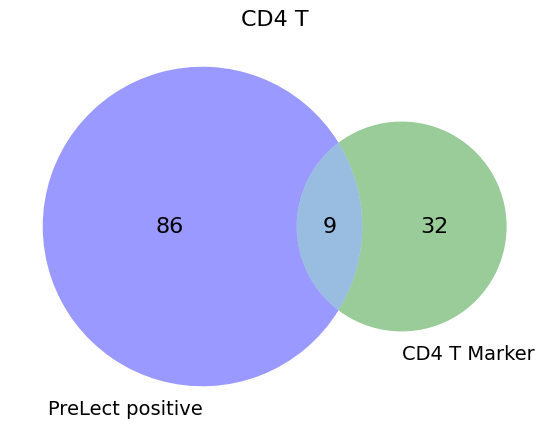

CD4t_common: ['CD3E', 'IL7R', 'NKG7', 'MT-ND4', 'CCL5', 'CD3D', 'CD4', 'TNFAIP3', 'LDHB', 'LTB', 'PTPRC', 'ISG20', 'CD3G']
CD4t_common_p: ['CD3E', 'IL7R', 'CD3D', 'CD4', 'TNFAIP3', 'LDHB', 'LTB', 'PTPRC', 'CD3G']


In [13]:
name = 'CD4-positive, alpha-beta T cell'
CD4t_common, CD4t_common_p = compare_PreLect_w_marker('CD4_T', features_dict, get_celltype_marker(name, marker_df), name='CD4 T')
overlapped_dict['CD4_T'] = CD4t_common
print('CD4t_common:', CD4t_common)
print('CD4t_common_p:', CD4t_common_p)

CD4_T All features common with markers: 16


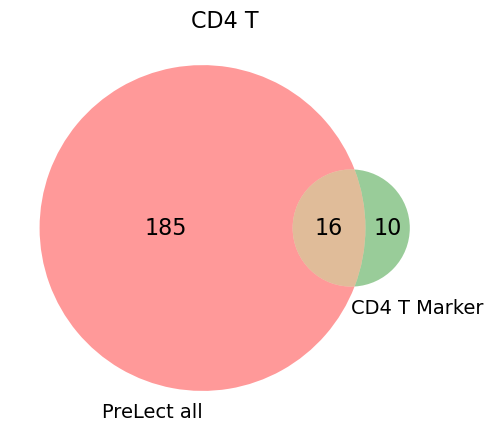

CD4_T Positive features common with markers: 15


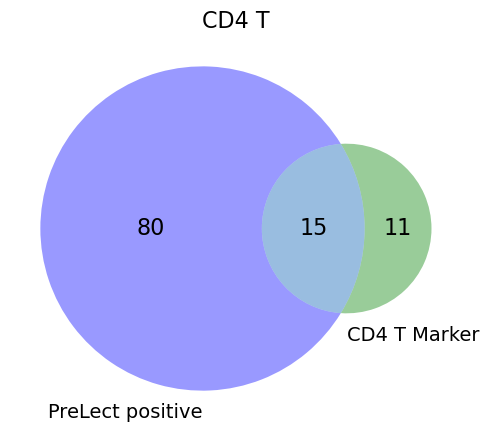

CD4t_common: ['PTPRC', 'LTB', 'IL7R', 'MAL', 'LDHB', 'KLF2', 'CD27', 'TRAC', 'CD3E', 'CD3D', 'CD4', 'ANXA1', 'TMSB10', 'CD3G', 'IL32', 'ITGB1']
CD4t_common_p: ['PTPRC', 'LTB', 'IL7R', 'MAL', 'LDHB', 'KLF2', 'TRAC', 'CD3E', 'CD3D', 'CD4', 'ANXA1', 'TMSB10', 'CD3G', 'IL32', 'ITGB1']


In [32]:
name = 'Central memory CD4-positive, alpha-beta T cell'
CD4t_common, CD4t_common_p = compare_PreLect_w_marker('CD4_T', features_dict, get_celltype_marker(name, marker_df), name='CD4 T')
print('CD4t_common:', CD4t_common)
print('CD4t_common_p:', CD4t_common_p)

## CD8 T

CD8_T All features common with markers: 8


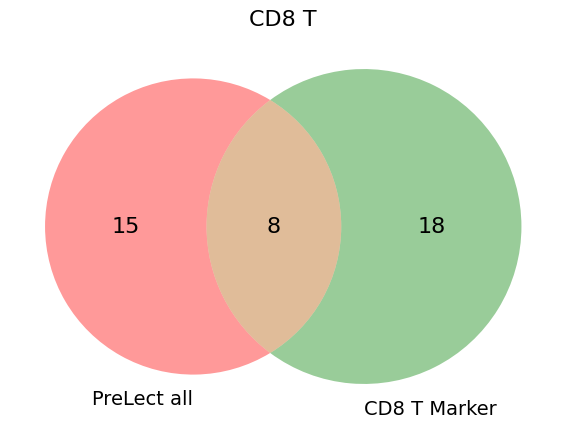

CD8_T Positive features common with markers: 6


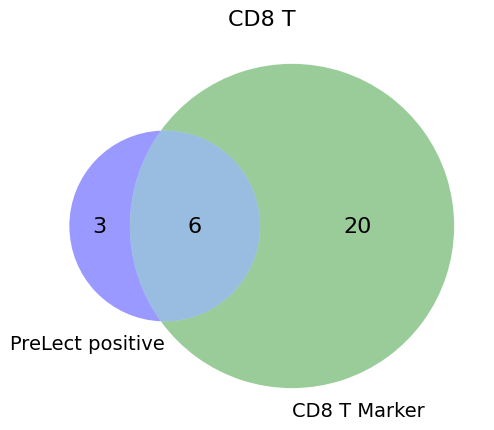

CD8t_common: ['CD3E', 'CD8B', 'CCL5', 'CD8A', 'CD3D', 'CD3G', 'LTB', 'KLRB1']
CD8t_common_p: ['CD3E', 'CD8B', 'CD3D', 'CD8A', 'CCL5', 'CD3G']


In [14]:
name = 'CD8-positive, alpha-beta T cell'
CD8t_common, CD8t_common_p = compare_PreLect_w_marker('CD8_T', features_dict, get_celltype_marker(name, marker_df), name='CD8 T')
overlapped_dict['CD8_T'] = CD8t_common
print('CD8t_common:', CD8t_common)
print('CD8t_common_p:', CD8t_common_p)

CD8_T All features common with markers: 8


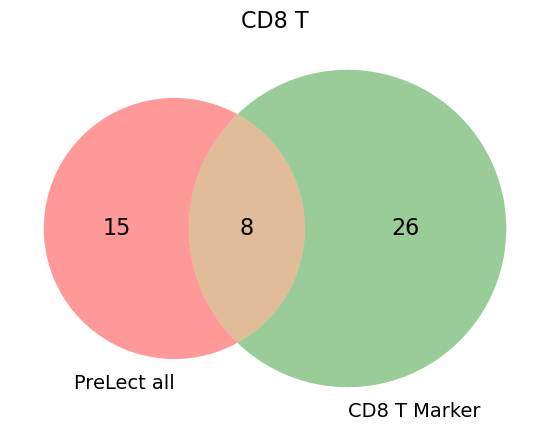

CD8_T Positive features common with markers: 7


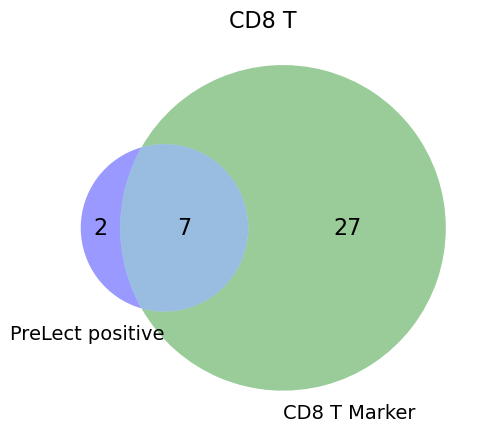

CD8t_common: ['TRAC', 'CD74', 'CD3E', 'CD3D', 'CCL5', 'CD3G', 'CD8B', 'CD8A']
CD8t_common_p: ['TRAC', 'CD3E', 'CD3D', 'CCL5', 'CD3G', 'CD8B', 'CD8A']


In [34]:
name = 'Effector memory CD8-positive, alpha-beta T cell'
CD8t_common, CD8t_common_p = compare_PreLect_w_marker('CD8_T', features_dict, get_celltype_marker(name, marker_df), name='CD8 T')
print('CD8t_common:', CD8t_common)
print('CD8t_common_p:', CD8t_common_p)

## DC

DC All features common with markers: 9


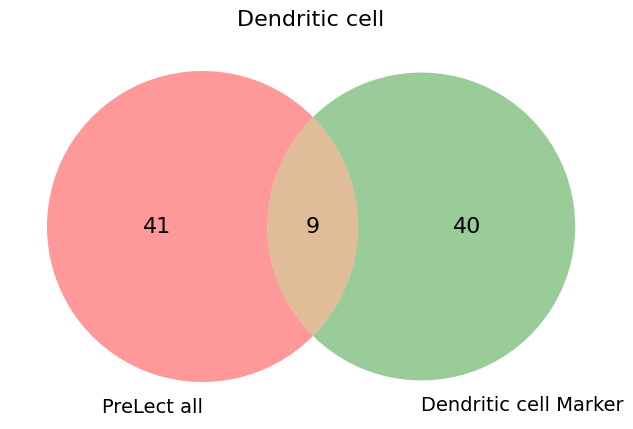

DC Positive features common with markers: 7


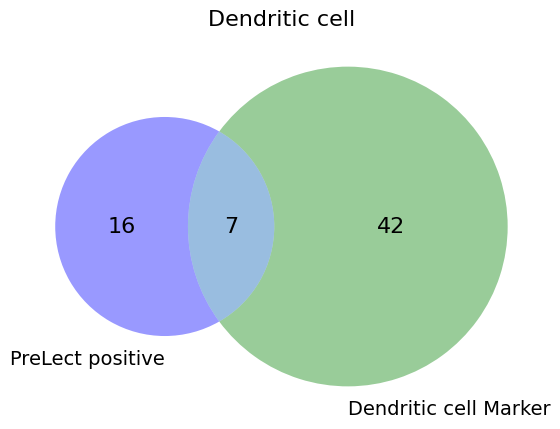

DC_common: ['CLEC10A', 'HLA-DPB1', 'IRF8', 'HLA-DPA1', 'CST3', 'S100A9', 'HLA-DRA', 'FTL', 'FCER1A']
DC_common_p: ['CLEC10A', 'IRF8', 'HLA-DPB1', 'HLA-DPA1', 'CST3', 'HLA-DRA', 'FCER1A']


In [15]:
name = 'Dendritic cell'
DC_common, DC_common_p = compare_PreLect_w_marker('DC', features_dict, get_celltype_marker(name, marker_df), name='Dendritic cell')
overlapped_dict['DC'] = DC_common
print('DC_common:', DC_common)
print('DC_common_p:', DC_common_p)

## Monocyte

Mono All features common with markers: 11


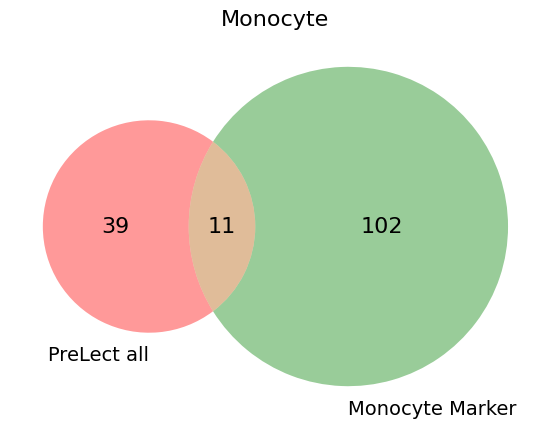

Mono Positive features common with markers: 10


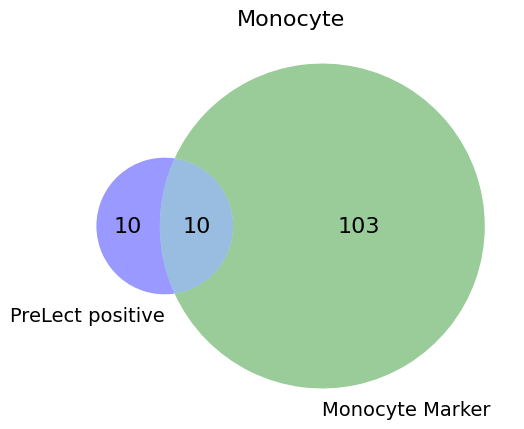

Mono_common: ['FCN1', 'LST1', 'NEAT1', 'MALAT1', 'S100A9', 'S100A8', 'FTL', 'CTSS', 'CFD', 'PSAP', 'CD14']
Mono_common_p: ['FCN1', 'LST1', 'NEAT1', 'S100A9', 'S100A8', 'FTL', 'CTSS', 'CFD', 'PSAP', 'CD14']


In [16]:
name = 'Monocyte'
Mono_common, Mono_common_p = compare_PreLect_w_marker('Mono', features_dict, get_celltype_marker(name, marker_df), name='Monocyte')
overlapped_dict['Mono'] = Mono_common
print('Mono_common:', Mono_common)
print('Mono_common_p:', Mono_common_p)

## NK

NK All features common with markers: 10


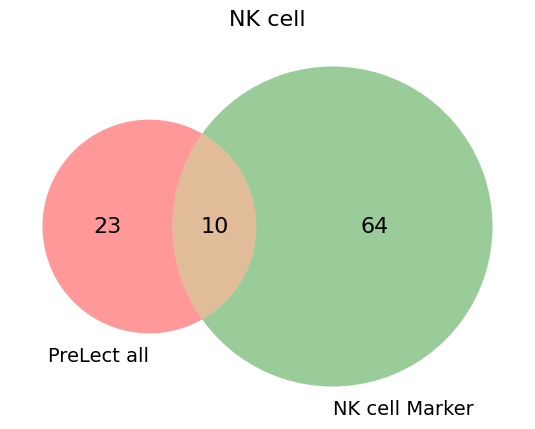

NK Positive features common with markers: 10


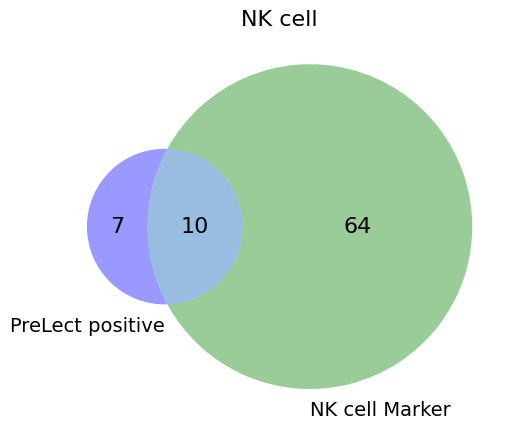

NK_common: ['NKG7', 'IL2RB', 'KLRF1', 'PRF1', 'KLRD1', 'SPON2', 'GZMB', 'GNLY', 'CD247', 'KLRB1']
NK_common_p: ['NKG7', 'IL2RB', 'PRF1', 'KLRF1', 'KLRD1', 'SPON2', 'GZMB', 'GNLY', 'CD247', 'KLRB1']


In [17]:
name = 'Natural killer cell'
NK_common, NK_common_p = compare_PreLect_w_marker('NK', features_dict, get_celltype_marker(name, marker_df), name='NK cell')
overlapped_dict['NK'] = NK_common
print('NK_common:', NK_common)
print('NK_common_p:', NK_common_p)

## Other T

In [40]:
get_celltype_marker(name, marker_df)

['SLC4A10',
 'KLRB1',
 'TRAV1-2',
 'CD3D',
 'CD3E',
 'CD3G',
 'CD8A',
 'CXCR4',
 'MAF',
 'ZBTB16']

other_T All features common with markers: 7


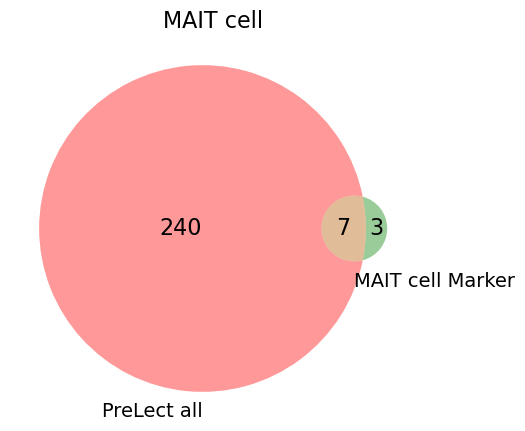

other_T Positive features common with markers: 6


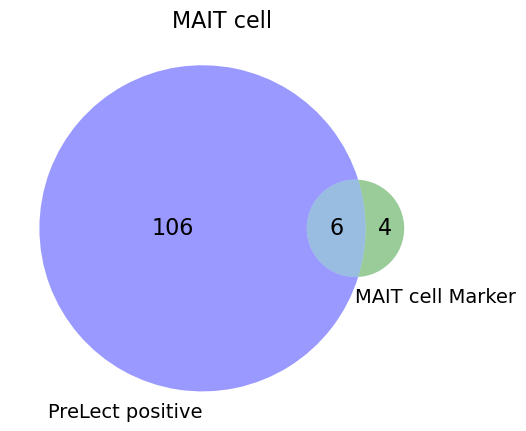

MAIT_common: ['KLRB1', 'CD3E', 'CD3D', 'SLC4A10', 'CD3G', 'CD8A', 'CXCR4']
MAIT_common_p: ['KLRB1', 'CD3E', 'CD3D', 'SLC4A10', 'CD3G', 'CXCR4']


In [39]:
name = 'Mucosal invariant T cell'
MAIT_common, MAIT_common_p = compare_PreLect_w_marker('other_T', features_dict, get_celltype_marker(name, marker_df), name='MAIT cell')
print('MAIT_common:', MAIT_common)
print('MAIT_common_p:', MAIT_common_p)

other_T All features common with markers: 7


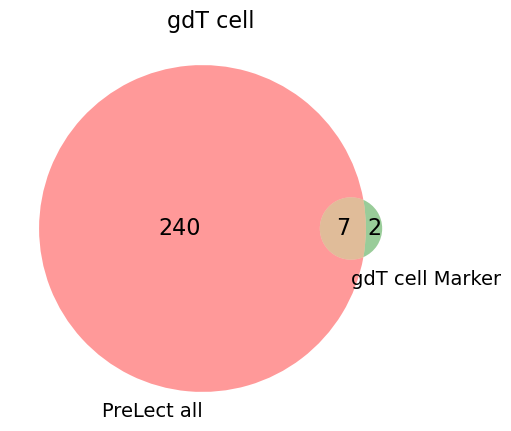

other_T Positive features common with markers: 5


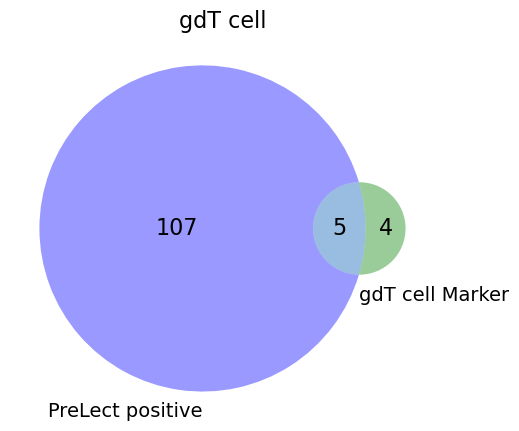

gdT_common: ['TRGC1', 'CD3E', 'CD3D', 'TRGC2', 'TRDC', 'CD8B', 'CD8A']
gdT_common_p: ['TRGC1', 'CD3E', 'CD3D', 'TRGC2', 'TRDC']


In [41]:
name = 'Gamma-delta T cell'
gdT_common, gdT_common_p = compare_PreLect_w_marker('other_T', features_dict, get_celltype_marker(name, marker_df), name='gdT cell')
print('gdT_common:', gdT_common)
print('gdT_common_p:', gdT_common_p)

## Export overlapped marker dict

In [18]:
overlapped_dict

{'B': ['CD74', 'MS4A1', 'IGKC', 'CD79B', 'CD79A', 'IGHM', 'HLA-DRA', 'PTPRC'],
 'CD4_T': ['CD3E',
  'IL7R',
  'NKG7',
  'MT-ND4',
  'CCL5',
  'CD3D',
  'CD4',
  'TNFAIP3',
  'LDHB',
  'LTB',
  'PTPRC',
  'ISG20',
  'CD3G'],
 'CD8_T': ['CD3E', 'CD8B', 'CCL5', 'CD8A', 'CD3D', 'CD3G', 'LTB', 'KLRB1'],
 'DC': ['CLEC10A',
  'HLA-DPB1',
  'IRF8',
  'HLA-DPA1',
  'CST3',
  'S100A9',
  'HLA-DRA',
  'FTL',
  'FCER1A'],
 'Mono': ['FCN1',
  'LST1',
  'NEAT1',
  'MALAT1',
  'S100A9',
  'S100A8',
  'FTL',
  'CTSS',
  'CFD',
  'PSAP',
  'CD14'],
 'NK': ['NKG7',
  'IL2RB',
  'KLRF1',
  'PRF1',
  'KLRD1',
  'SPON2',
  'GZMB',
  'GNLY',
  'CD247',
  'KLRB1']}

In [19]:
for k, v in overlapped_dict.items():
    print(k, len(v))

B 8
CD4_T 13
CD8_T 8
DC 9
Mono 11
NK 10


In [ ]:
import json

# os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\ACT_annotation")
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/ACT_annotation')

with open('L1_PreLect_ACT_overlap.json', 'w') as f:
    json.dump(overlapped_dict, f)